# House Prices - Advanced Regression Techniques

<img src="banner.png" style="width:1500px"/>

KAGGLE-X MENTORSHIP

My name is Odutayo Odufuwa mentored by Nafisa Lawal. I would embarking on this project that allows me learn machine learning techniques such as feature engineering, data pewprocessing, model evaluation, model deployment and so on.

The goal of the project is to predict sales prices of houses based on various house features.

<a id="cont"></a>

### Table of Contents

<a href=#zero>0. Overview</a>

<a href=#one>1. Dataset Description</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

 <a id="zero"></a>
### 0. Overview
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Overview ⚡ |
| :--------------------------- |
| In this section, the project is described. |

---

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. This dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

 <a id="one"></a>
### 1. Dataset Description
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Dataset Description ⚡ |
| :--------------------------- |
| In this section, the features of the dataset are explored. |

---

In [1]:
with open("data_description.txt", "r") as file:
    lines = file.readlines()
    f_lines = [line for line in lines if ":" in line]
    columns = []
    for line in f_lines:
       if not line.strip()[0].isdigit():
           col_name = line[:line.find(":")]
           columns.append(col_name)

dataset_fields = columns


In [2]:
print(f"The first 5 fields in the dataset are: {dataset_fields[:5]}")

The first 5 fields in the dataset are: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street']


See the "data_description.txt" file for more details

 <a id="two"></a>
### 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, the packages and libraries necessary for analysis are imported |

---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

 <a id="three"></a>
### 3. Loading Data
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading Data ⚡ |
| :--------------------------- |
| In this section, the `train` and `test` data are loaded. |

---

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
print(f"The train data consists of {df_train.shape[0]} rows and {df_train.shape[1]} columns")
print(f"The train data consists of {df_test.shape[0]} rows and {df_test.shape[1]} columns")

The train data consists of 1460 rows and 81 columns
The train data consists of 1459 rows and 80 columns


 <a id="four"></a>
### 4. Exploratory Data Analysis
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory Data Analysis ⚡ |
| :--------------------------- |
| In this section, an in-depth analysis of all the variables in the DataFrame would be performed. |

---

In [8]:
print(f"The dataset consists of fields with the following datatypes: {df_train.dtypes.unique()[0]}, {df_train.dtypes.unique()[1]}, {df_train.dtypes.unique()[2]}")

The dataset consists of fields with the following datatypes: int64, object, float64


In [9]:
numerical_columns = [col for col in df_train.columns if df_train[col].dtype == "int64" or df_train[col].dtype == "float64"]
categorical_columns = [col for col in df_train.columns if df_train[col].dtype == "object"]

print(f"In the train dataset, there are {len(numerical_columns)} numerical columns. There are also {len(categorical_columns)} categorical columns.")

In the train dataset, there are 38 numerical columns. There are also 43 categorical columns.


In [10]:
print("See all numerical columns in the train dataset below\n")
for i in range(0, len(numerical_columns), 10):
    print(numerical_columns[i:i + 10])

See all numerical columns in the train dataset below

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath']
['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [11]:
print("See all categorical columns in the train dataset below\n")
for i in range(0, len(categorical_columns), 10):
    print(categorical_columns[i:i + 10])

See all categorical columns in the train dataset below

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']
['Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond']
['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']
['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
['MiscFeature', 'SaleType', 'SaleCondition']


In [12]:
null_counts = df_train.isnull().sum()
null_counts_df = pd.DataFrame({'Column Names': null_counts.index, 'Null Count': null_counts.values})
null_counts_df = null_counts_df[null_counts_df["Null Count"] > 0] # returns columns with null values

null_counts_df

,Column Names,Null Count
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


In [13]:
print(f"The above output confirms that out of {len(df_train.columns)} columns in the df_train dataset, there are {len(null_counts_df)} columns with null values")

The above output confirms that out of 81 columns in the df_train dataset, there are 19 columns with null values


In [14]:
# look at data statistics
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
# create empty lists for the respective columns to be added
high_negative_skew = []
moderate_negative_skew = []
fairly_symmetrical = []
moderate_positive_skew = []
high_positive_skew = []


def skew(df):  # this evaluates the skewness of each numerical variale 
    skew = pd.DataFrame(df.skew()).to_dict()[0]
    for k, v in skew.items():
        if v < -1:
            high_negative_skew.append(k)
        elif v > -1 and v < -0.5:
            moderate_negative_skew.append(k)
        elif v > -0.5 and v < 0.5:
            fairly_symmetrical.append(k)
        elif v > 0.5 and v < 1:
            moderate_positive_skew.append(k)
        else:
            high_positive_skew.append(k)
    print(f"The following columns are highly negative skewed - {high_negative_skew}.\nThe following columns are moderately negative skewed - {moderate_negative_skew}.\nThe following columns are fairly symmetrical - {fairly_symmetrical}.\nThe following columns are moderately positive skewed - {moderate_positive_skew}.\nThe following columns are highly positive skewed - {high_positive_skew}.\n")

skew(df_train)

The following columns are highly negative skewed - [].
The following columns are moderately negative skewed - ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'].
The following columns are fairly symmetrical - ['Id', 'OverallQual', 'FullBath', 'BedroomAbvGr', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold'].
The following columns are moderately positive skewed - ['OverallCond', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces'].
The following columns are highly positive skewed - ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'].



In [16]:
contains_high_outliers = []
no_outliers = []

def kurtosis(df):
    kurtosis = pd.DataFrame(df.kurtosis()).to_dict()[0]
    for k, v in kurtosis.items():
        if v < 3:
            no_outliers.append(k)
        else:
            contains_high_outliers.append(k)
    print(f"The following columns contain a large number of outliers - {contains_high_outliers}.\nThe following columns contain no outliers - {no_outliers}.")
    
kurtosis(df_train)

The following columns contain a large number of outliers - ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'].
The following columns contain no outliers - ['Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'MoSold', 'YrSold'].


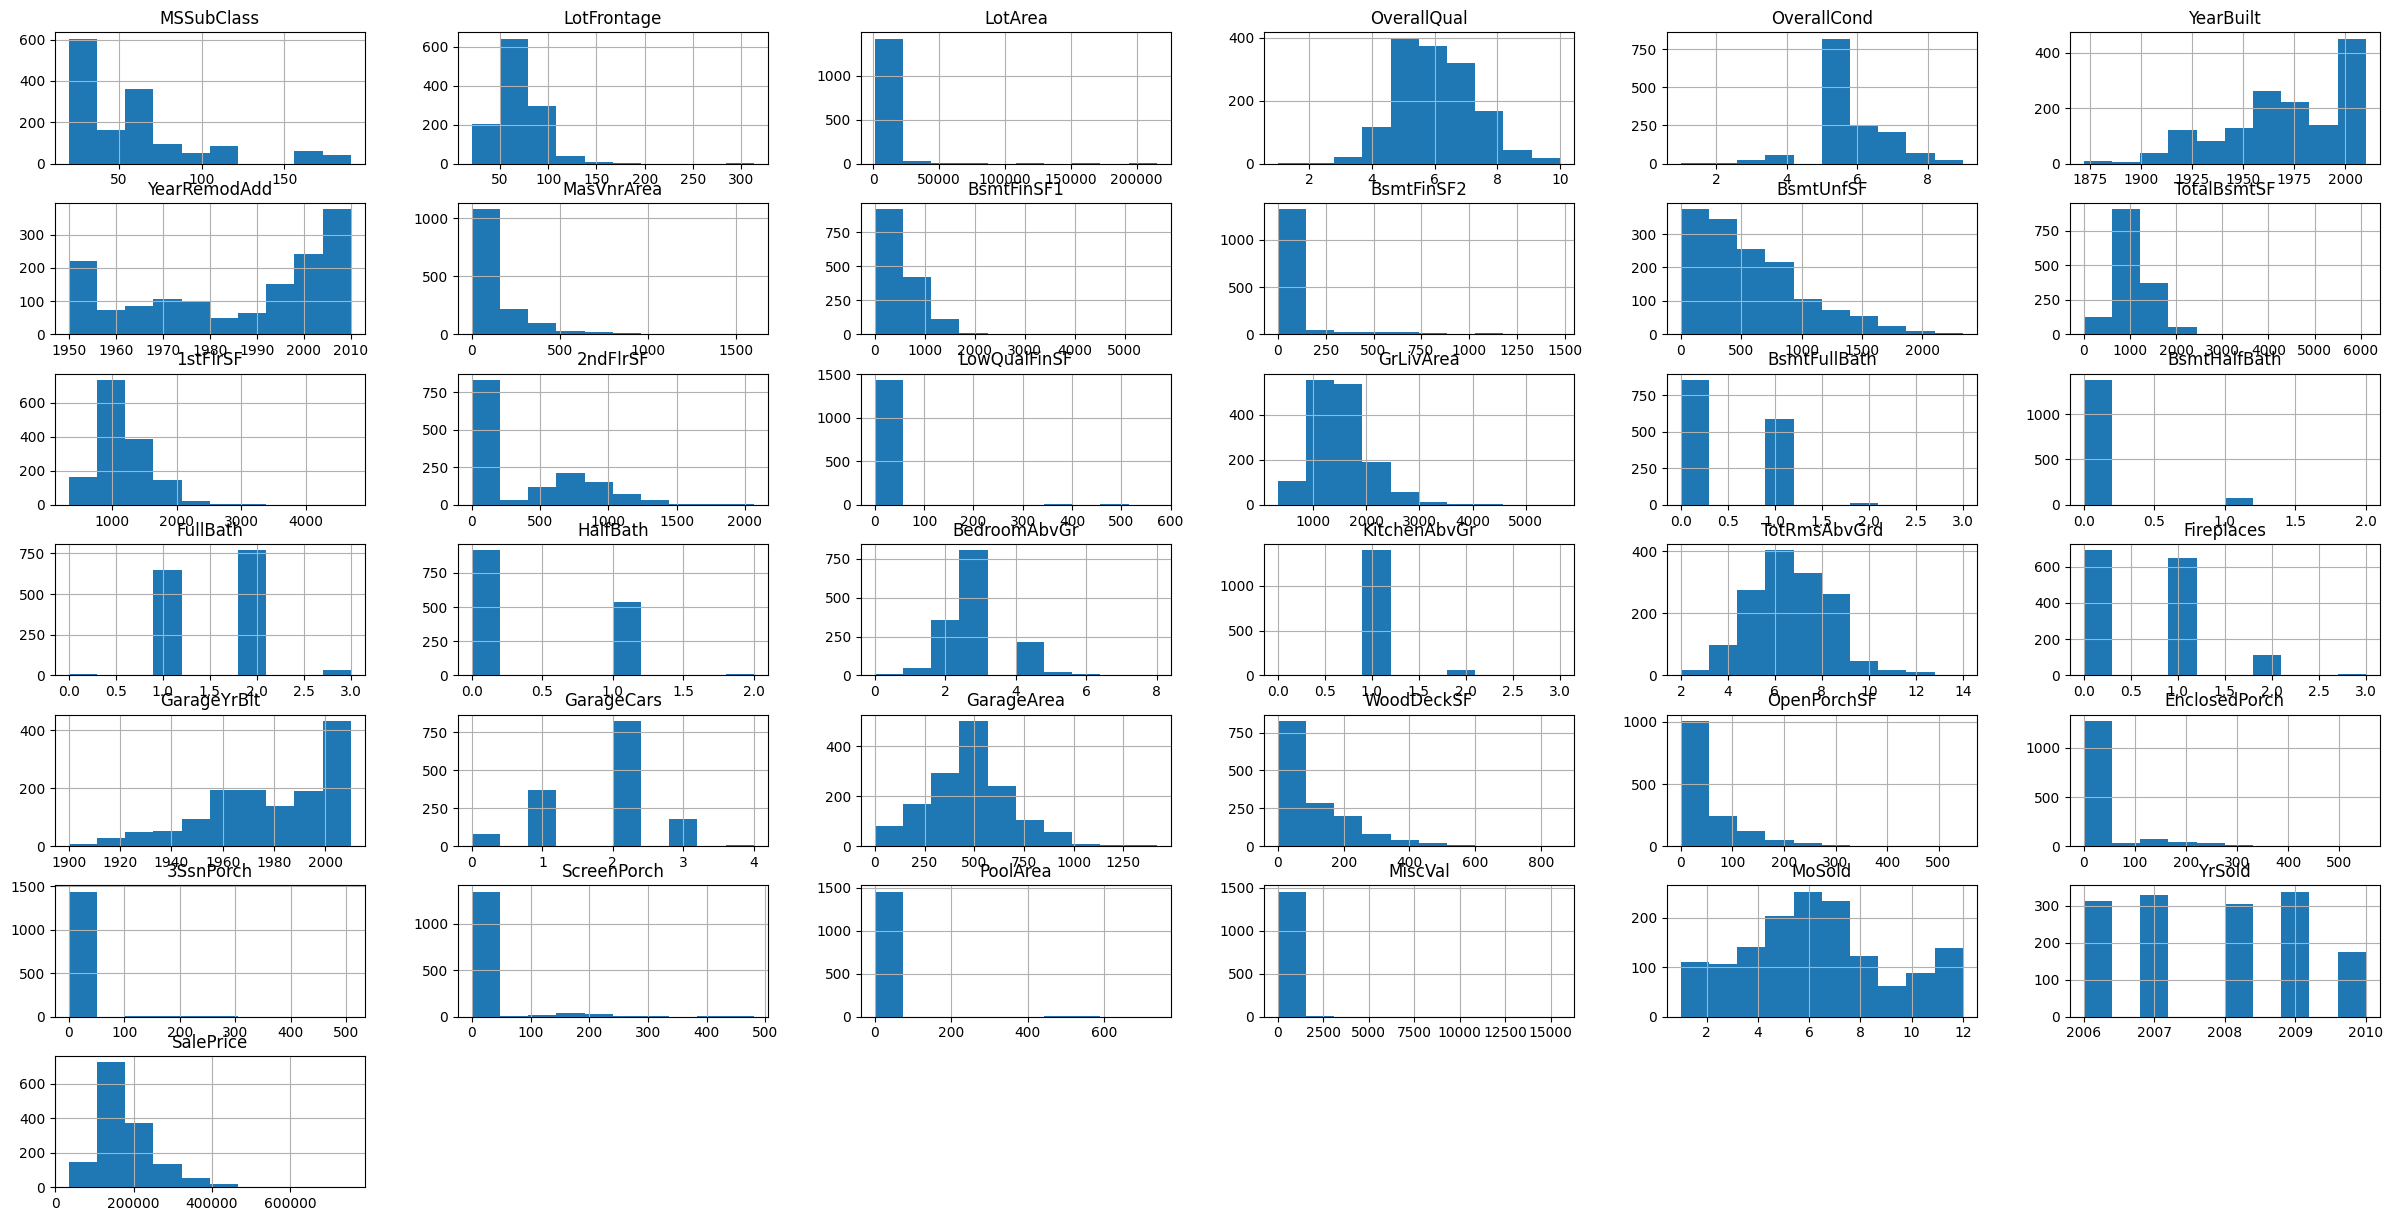

In [17]:
df_train[numerical_columns[1:]].hist(figsize=(30,15))

# plt.tight_layout()
plt.show()

In [18]:
len(df_train['MSZoning'].unique())

5

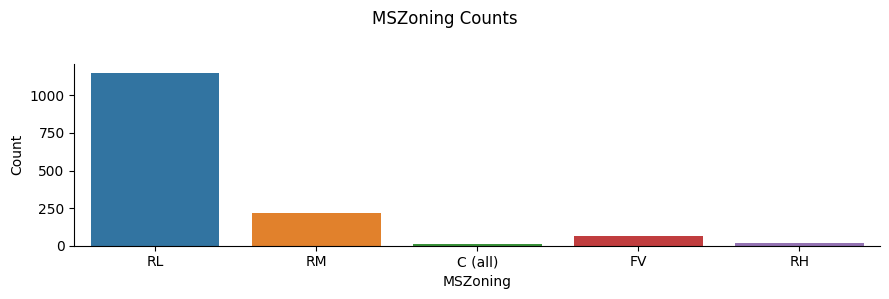

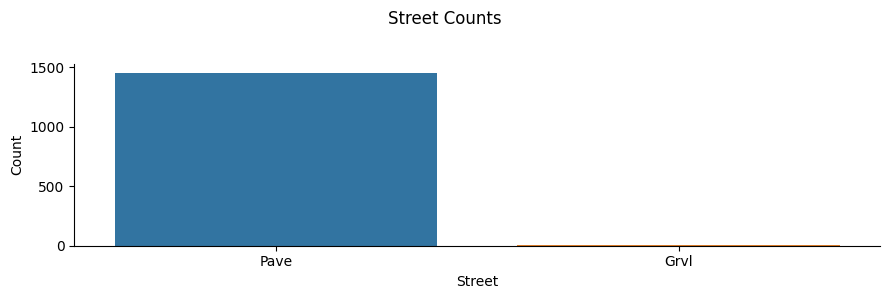

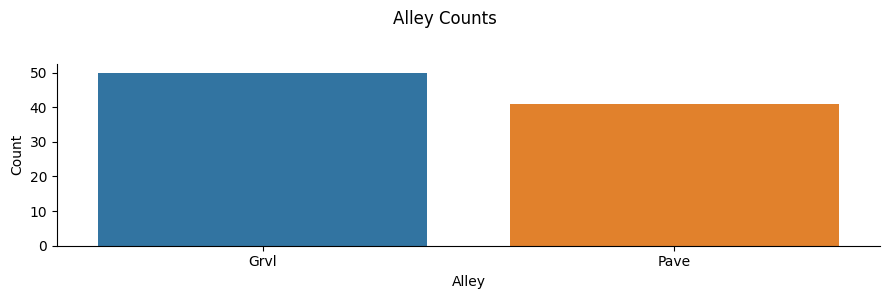

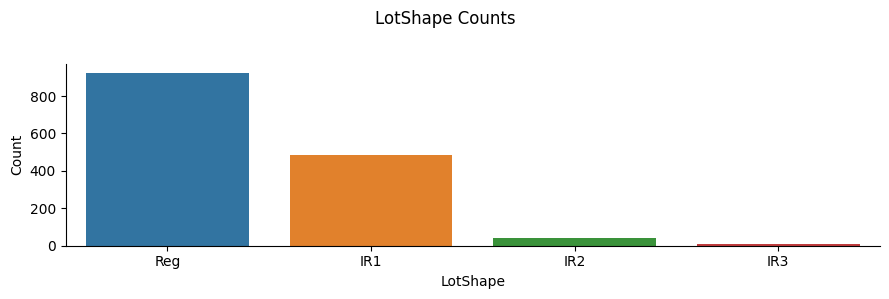

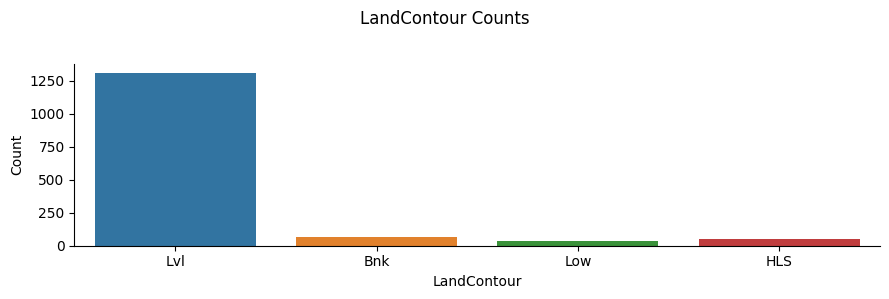

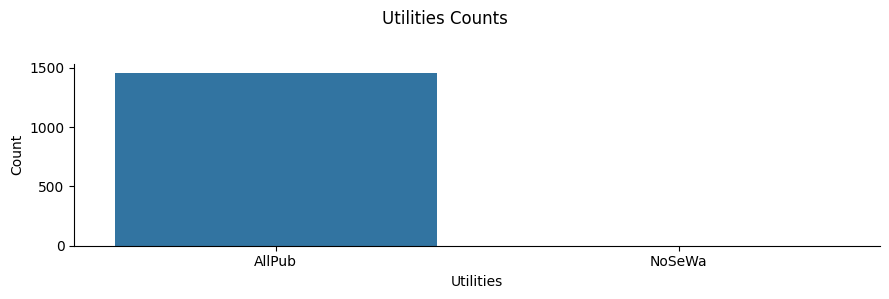

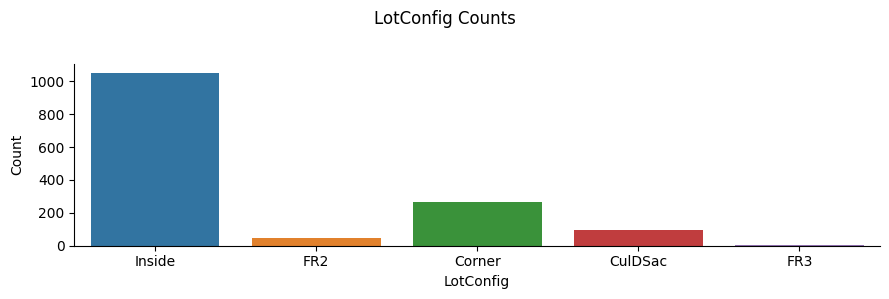

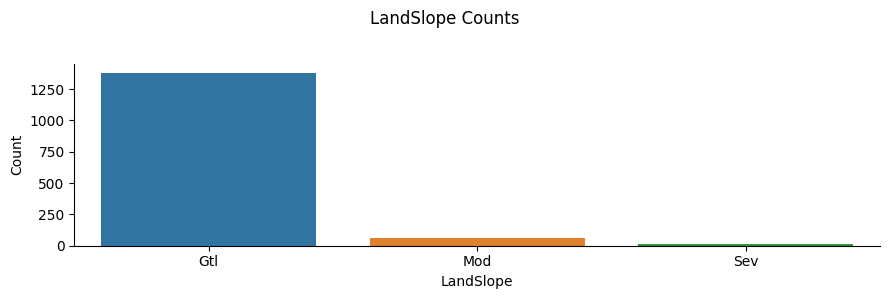

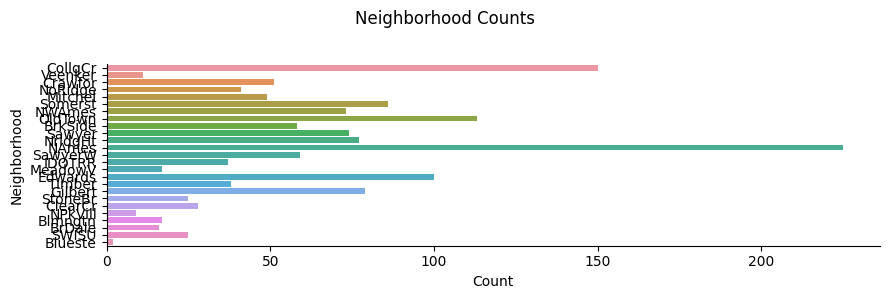

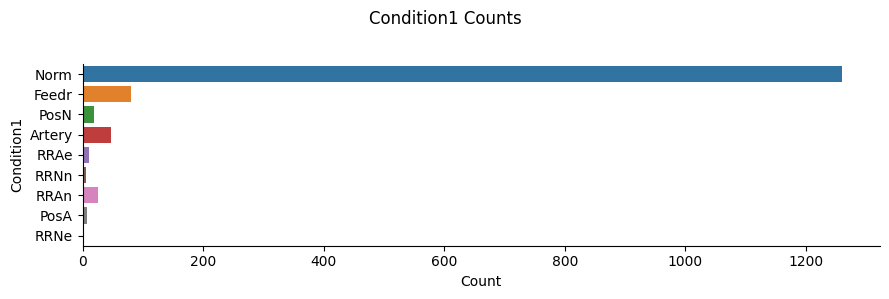

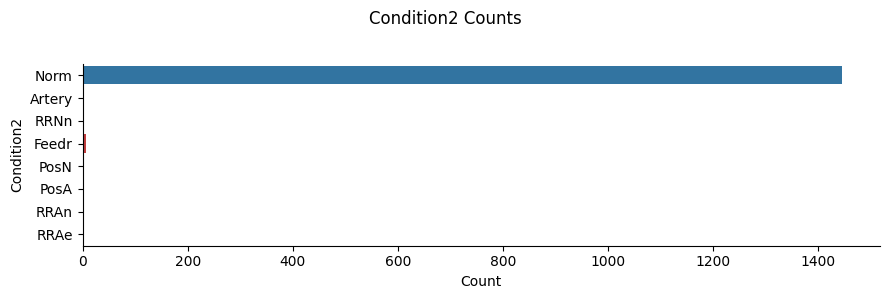

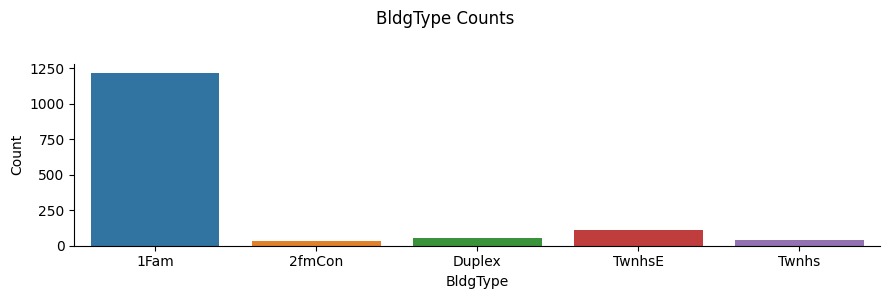

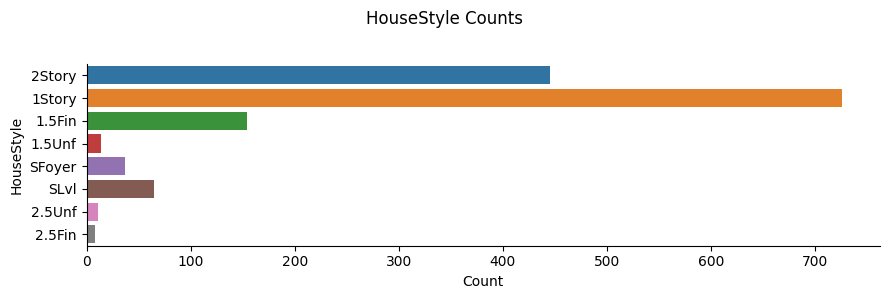

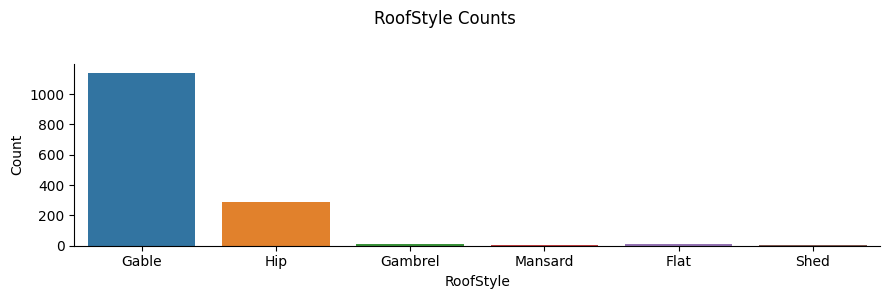

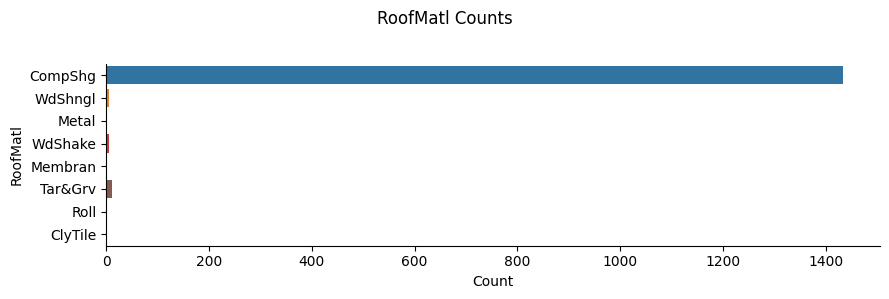

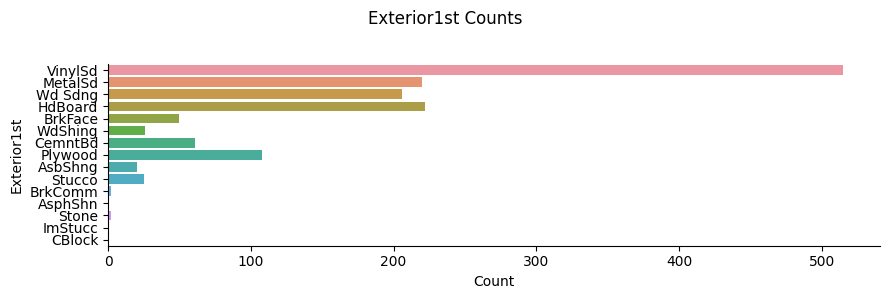

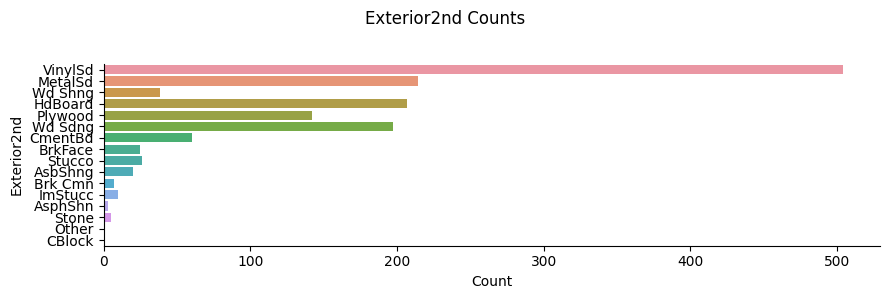

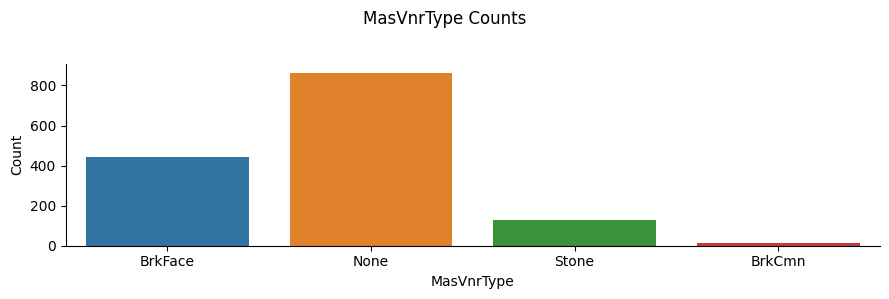

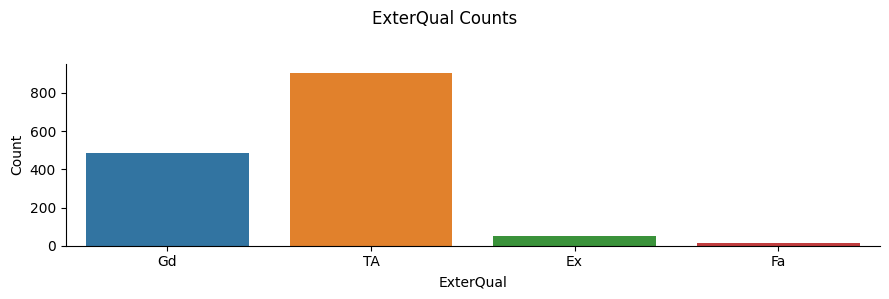

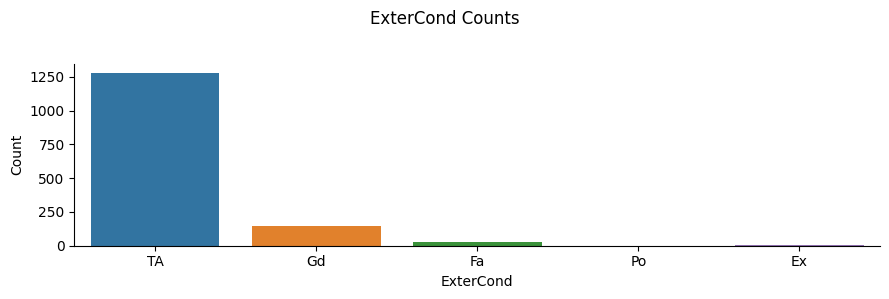

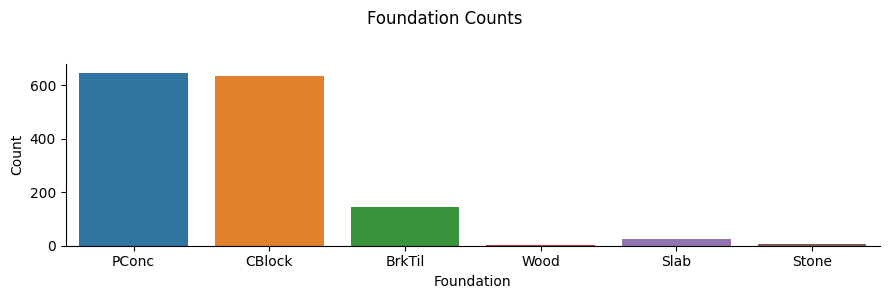

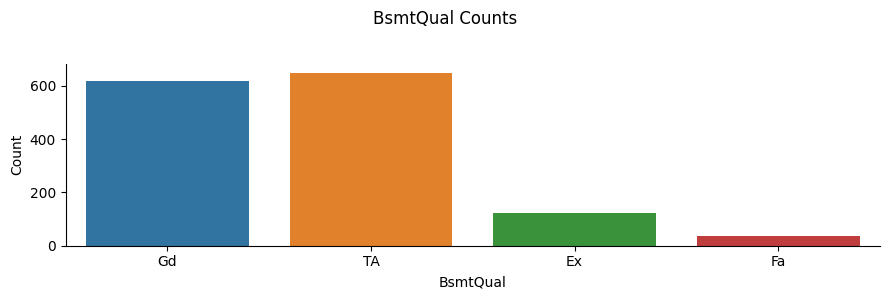

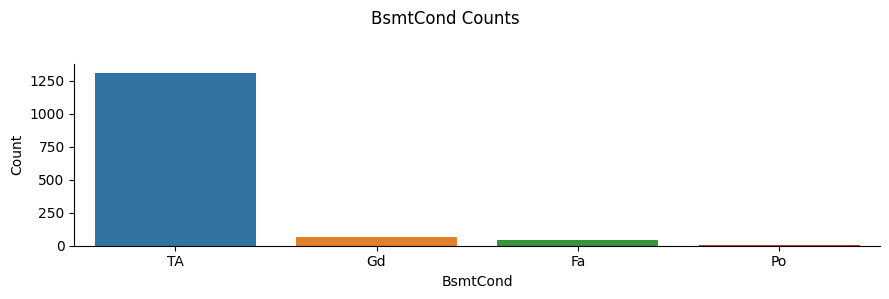

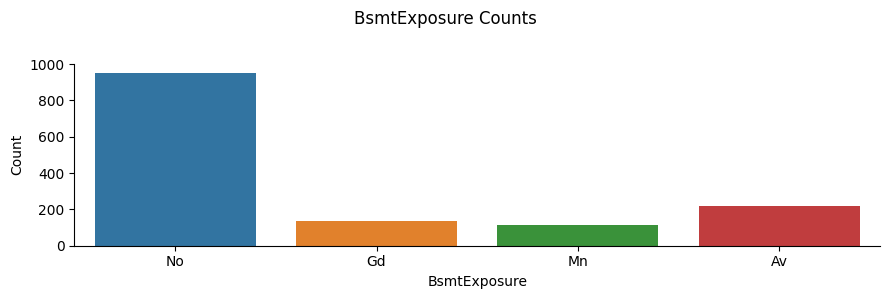

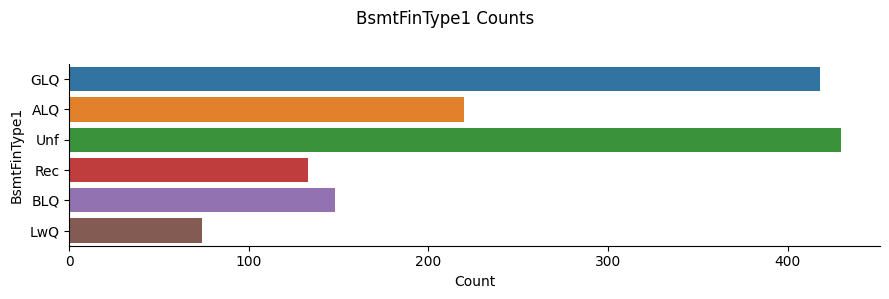

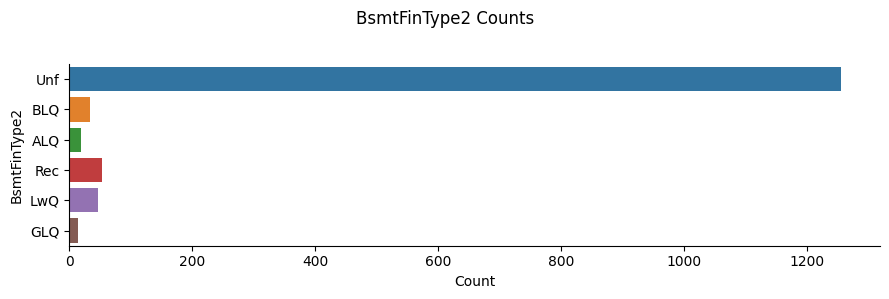

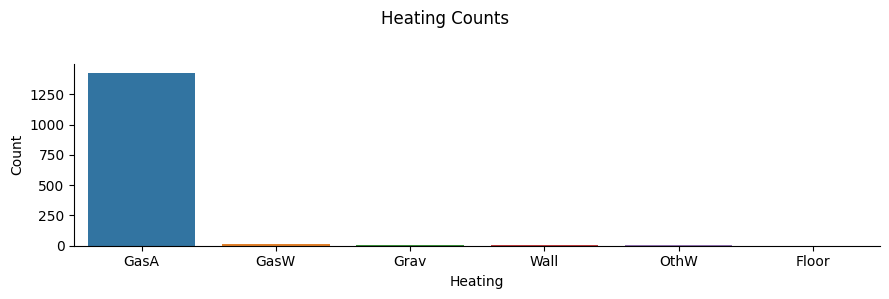

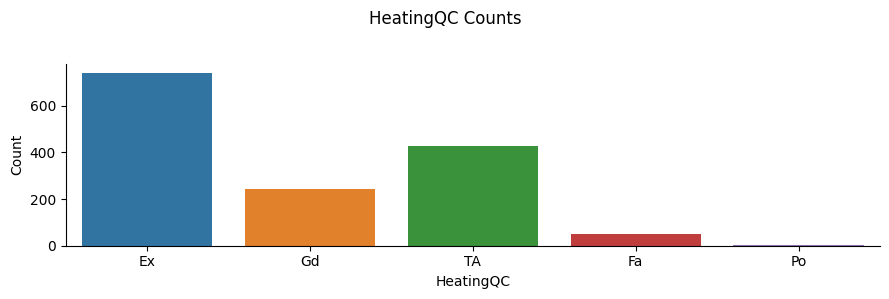

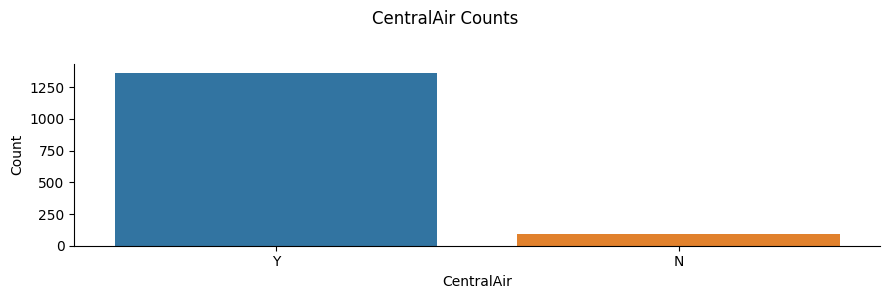

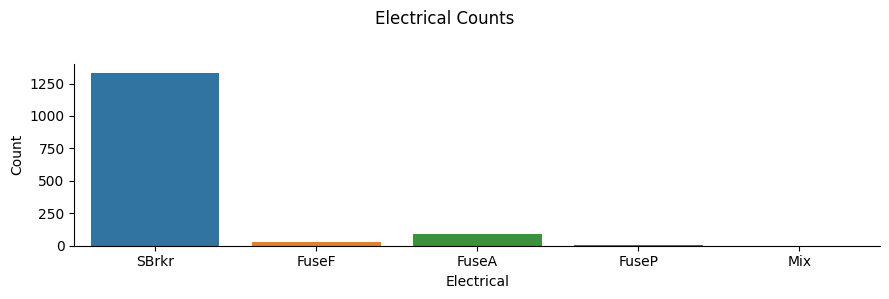

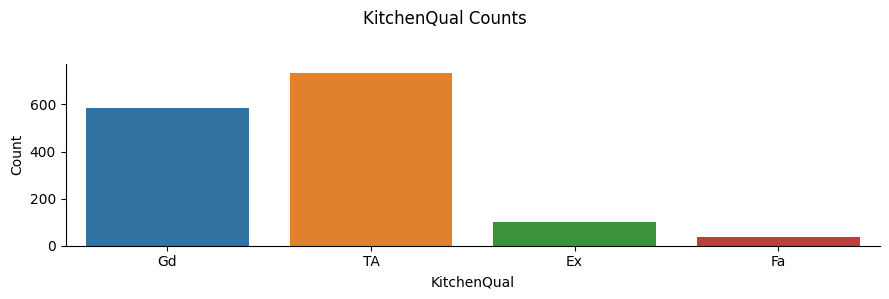

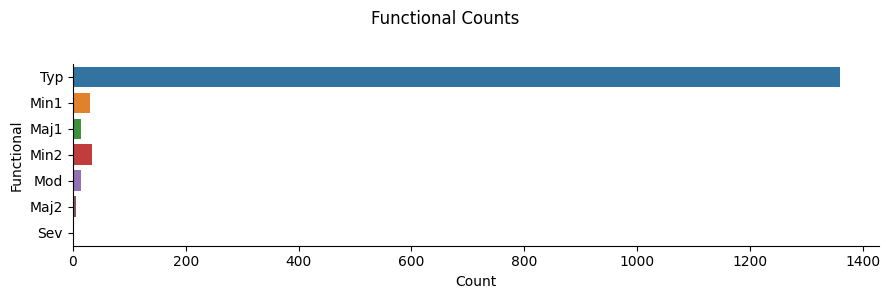

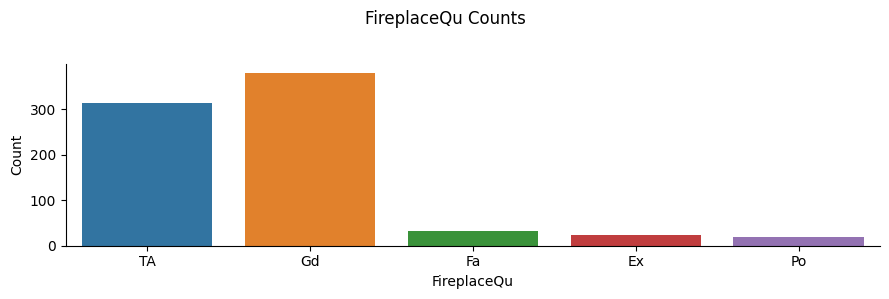

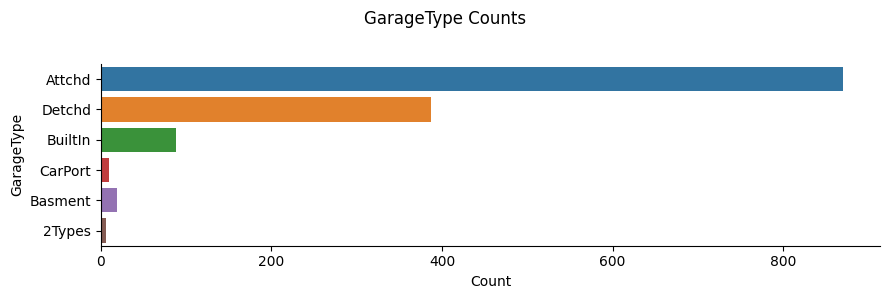

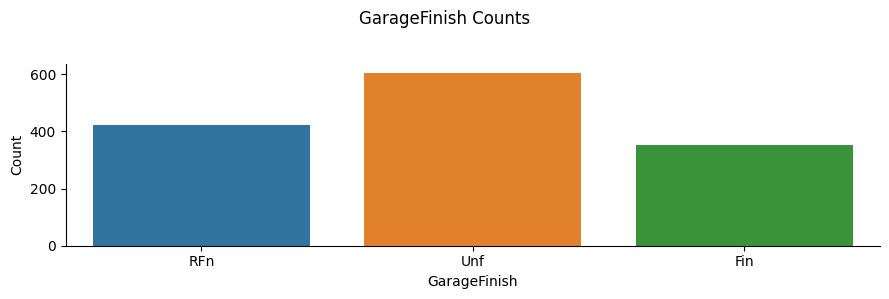

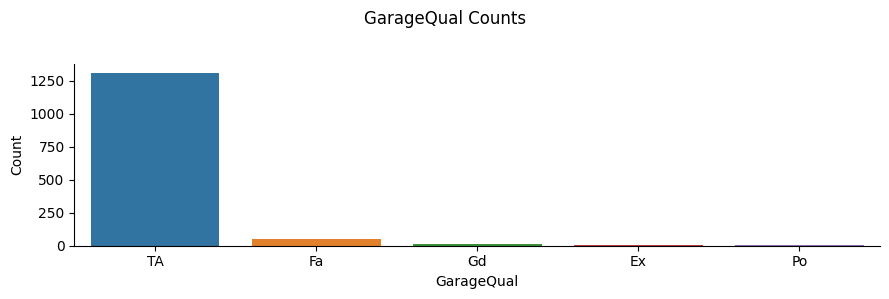

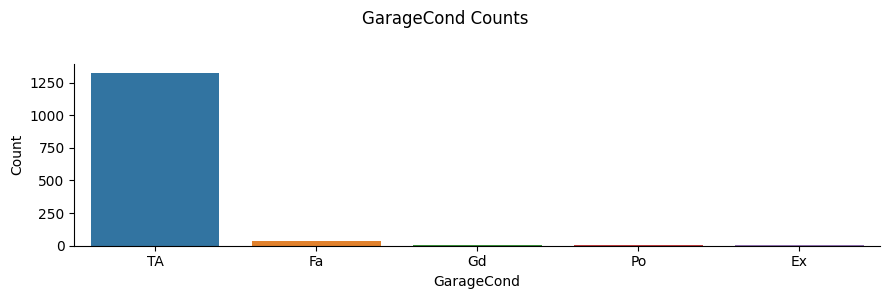

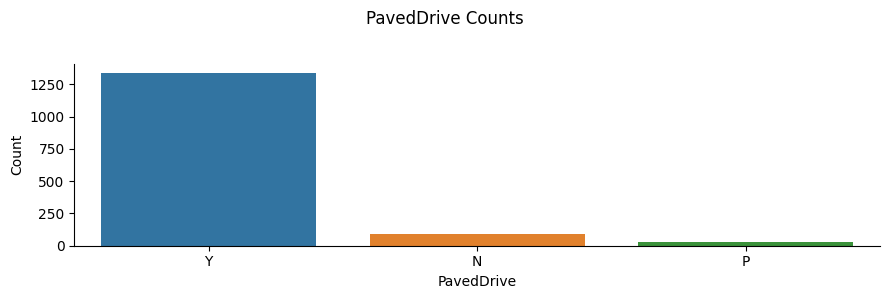

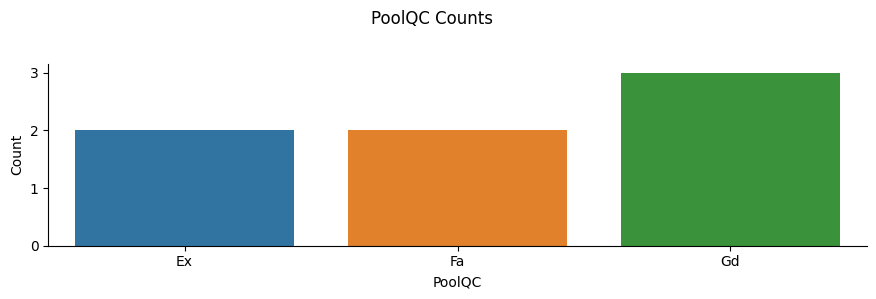

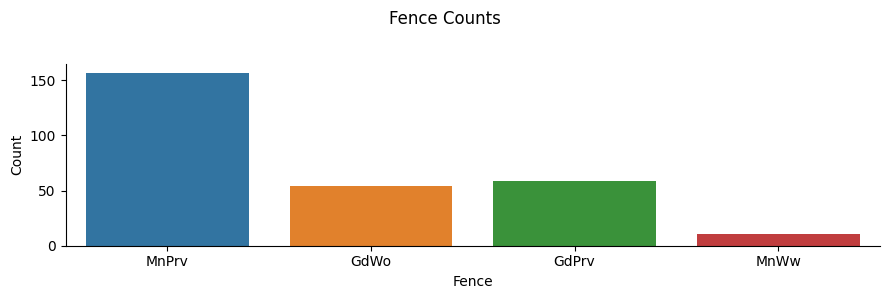

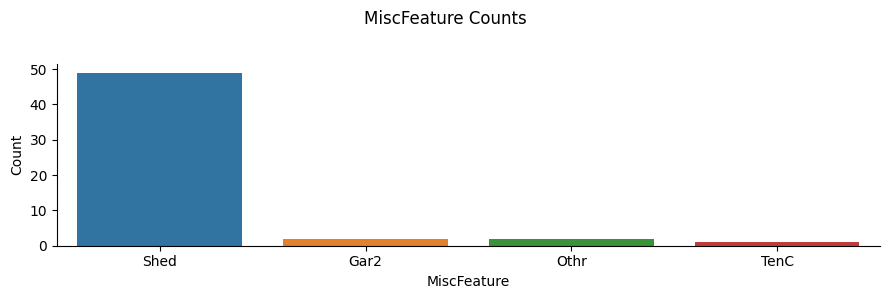

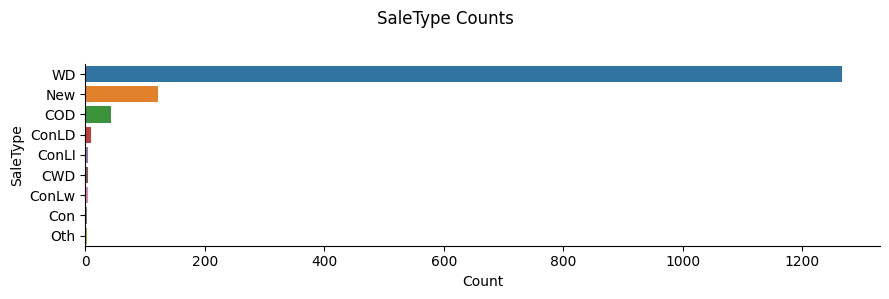

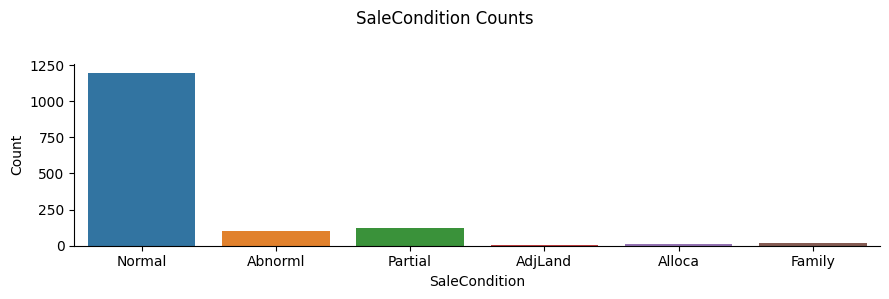

In [19]:
for col in categorical_columns:
    if len(df_train[col].unique()) < 7:
        g = sns.catplot(kind='count', data=df_train, x=col, aspect=3, height=3)
        g.set_axis_labels(f'{col}', 'Count')
        g.fig.suptitle(f'{col} Counts')
        plt.subplots_adjust(top=0.8)
    
    else:
        g = sns.catplot(kind='count', data=df_train, y=col, aspect=3, height=3)
        g.set_axis_labels('Count', f'{col}')
        g.fig.suptitle(f'{col} Counts')
        plt.subplots_adjust(top=0.8)  

plt.show()

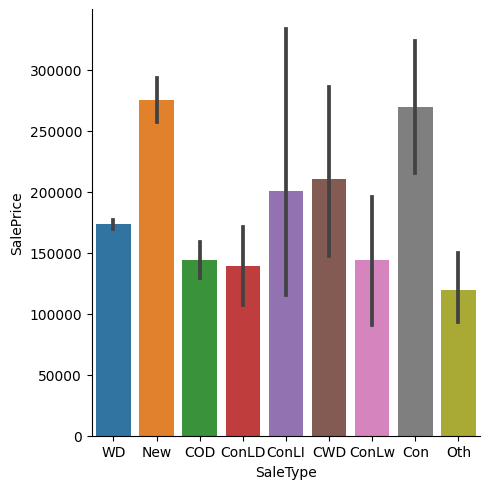

In [20]:
sns.catplot(data=df_train, kind='bar', x='SaleType', y='SalePrice')

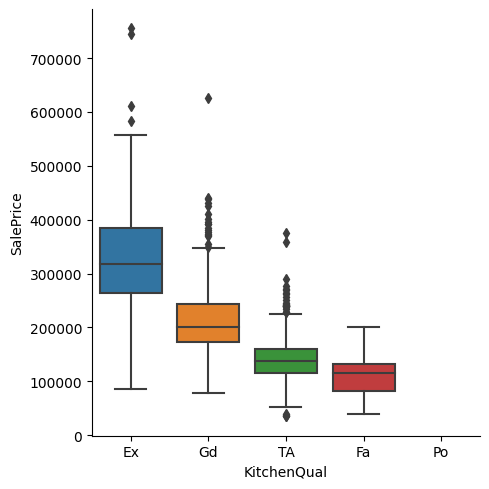

In [21]:
k_quality_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
sns.catplot(data=df_train, kind='box', x='KitchenQual', y='SalePrice', order=k_quality_order)

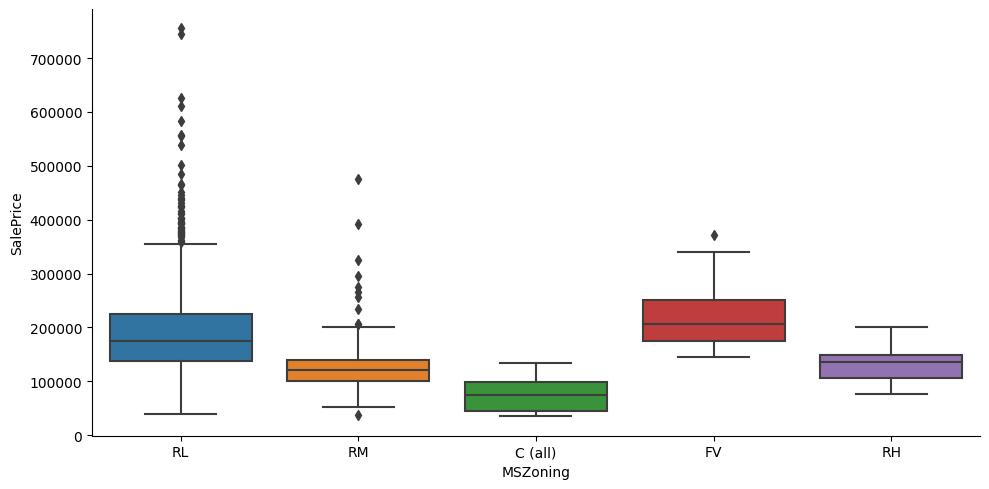

In [22]:
"""     A	Agriculture
        C	Commercial
        FV	Floating Village Residential
        I	Industrial
        RH	Residential High Density
        RL	Residential Low Density
        RP	Residential Low Density Park 
        RM	Residential Medium Density """

sns.catplot(data=df_train, kind='box', x='MSZoning', y='SalePrice', aspect=2)

In [23]:
# plot relevant feature interactions

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

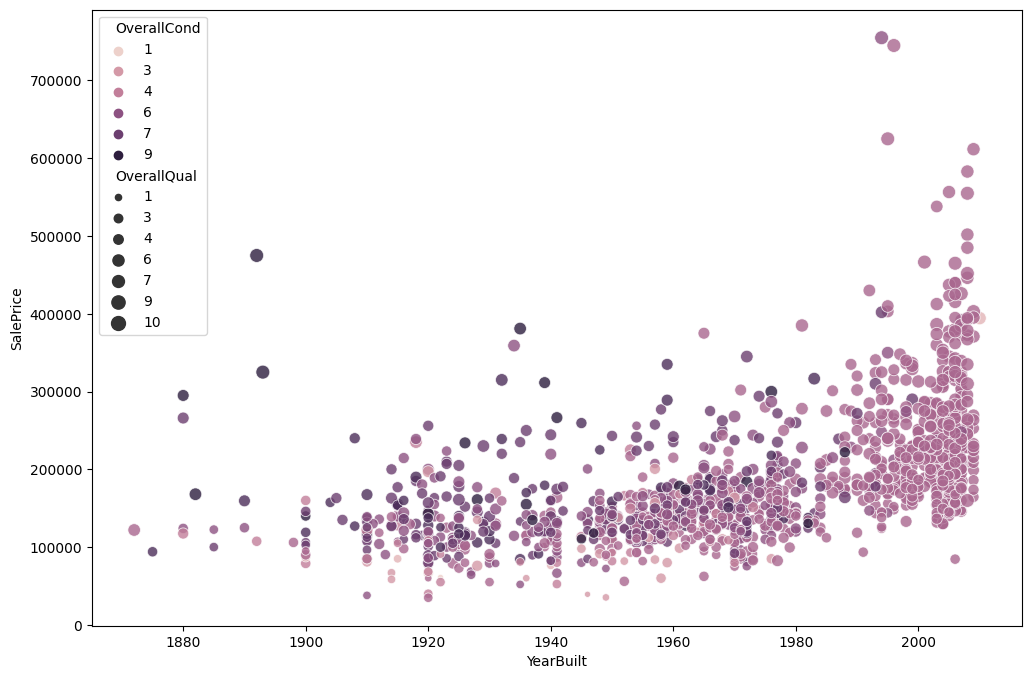

In [24]:
# evaluate correlation
plt.figure(figsize=(12,8))
sns.scatterplot(x="YearBuilt",
                y="SalePrice",
                size="OverallQual",
                sizes=(20,100),
                alpha=0.8,
                hue="OverallCond",
                data=df_train)

The scatter plot above indicates that the overall quality of the house affects sale price more than the overall condition of the house.

The chart also shows that majority of the recently built houses are not in great condition, however, they have great overall quality

#### Handling Missing Values

    ###### Removing Features

In [25]:
df_train_copy = df_train.copy()

In [26]:
def drop_columns(input_df, threshold, unique_value_threshold):
    """
    Remove columns from a DataFrame based on missing value and unique value thresholds.

    Args:
        input_df (pd.DataFrame): The input DataFrame.
        threshold (float): The threshold for missing values (0-100).
        unique_value_threshold (float): The threshold for unique values (0-100).

    Returns:
        pd.DataFrame: The DataFrame with columns removed based on the thresholds.
    """

    # Calculate the percentage of missing values for each column
    missing_percentage = (input_df.isnull().mean() * 100)

    # Calculate the percentage of unique values for each column
    unique_percentage = (input_df.nunique() / len(input_df)) * 100

    # Find columns that exceed the missing value threshold or have low unique value percentage
    columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()
    columns_to_drop += unique_percentage[unique_percentage < unique_value_threshold].index.tolist()

    # Remove the identified columns
    output_df = input_df.drop(columns=columns_to_drop)

    return output_df

In [27]:
df = drop_columns(df_train_copy, 30, 0.03)
df.shape

(1460, 76)

The number of columns have dropped from 81 to 76

In [28]:
df_num_cols = [col for col in df.columns if df[col].dtype == "int64" or df[col].dtype == "float64"]
df_cat_cols = [col for col in df.columns if df[col].dtype == "object"]

print(f"Currently there are {len(df_num_cols)} numerical columns and {len(df_cat_cols)} categorical columns")

Currently there are 38 numerical columns and 38 categorical columns


    ##### Data Imputation

    ##### Data type update

In [29]:
df1 = df.copy()
df1.set_index('Id', inplace=True)v

In [ ]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [39]:
yr_cols = [col for col in df1.columns if col.strlower()]
yr_cols

AttributeError: 'str' object has no attribute 'contains'

    ##### Dummy Variable Encoding

In [30]:
df1_dum = pd.get_dummies(df1, drop_first=True)

# Again we make sure that all the column names have underscores instead of whitespaces
df1_dum.columns = [col.replace(" ","_") for col in df1_dum.columns]

df1_dum.shape

(1460, 233)

In [31]:
df_dum_num_cols = [col for col in df1_dum.columns if df1_dum[col].dtype == "int64" or df1_dum[col].dtype == "uint8" or df1_dum[col].dtype == "float64"]
df_dum_cat_cols = [col for col in df1_dum.columns if df1_dum[col].dtype == "object"]

print(f"""Now there are {len(df_dum_num_cols)} numerical columns and {len(df_dum_cat_cols)} categorical columns.append.
This is because the categorial columns have een encoded into numerical values, hence, increasing the total number ofcolumns from 76 to 271""")

Now there are 233 numerical columns and 0 categorical columns.append.
This is because the categorial columns have een encoded into numerical values, hence, increasing the total number ofcolumns from 76 to 271


#### Checking for Linearity

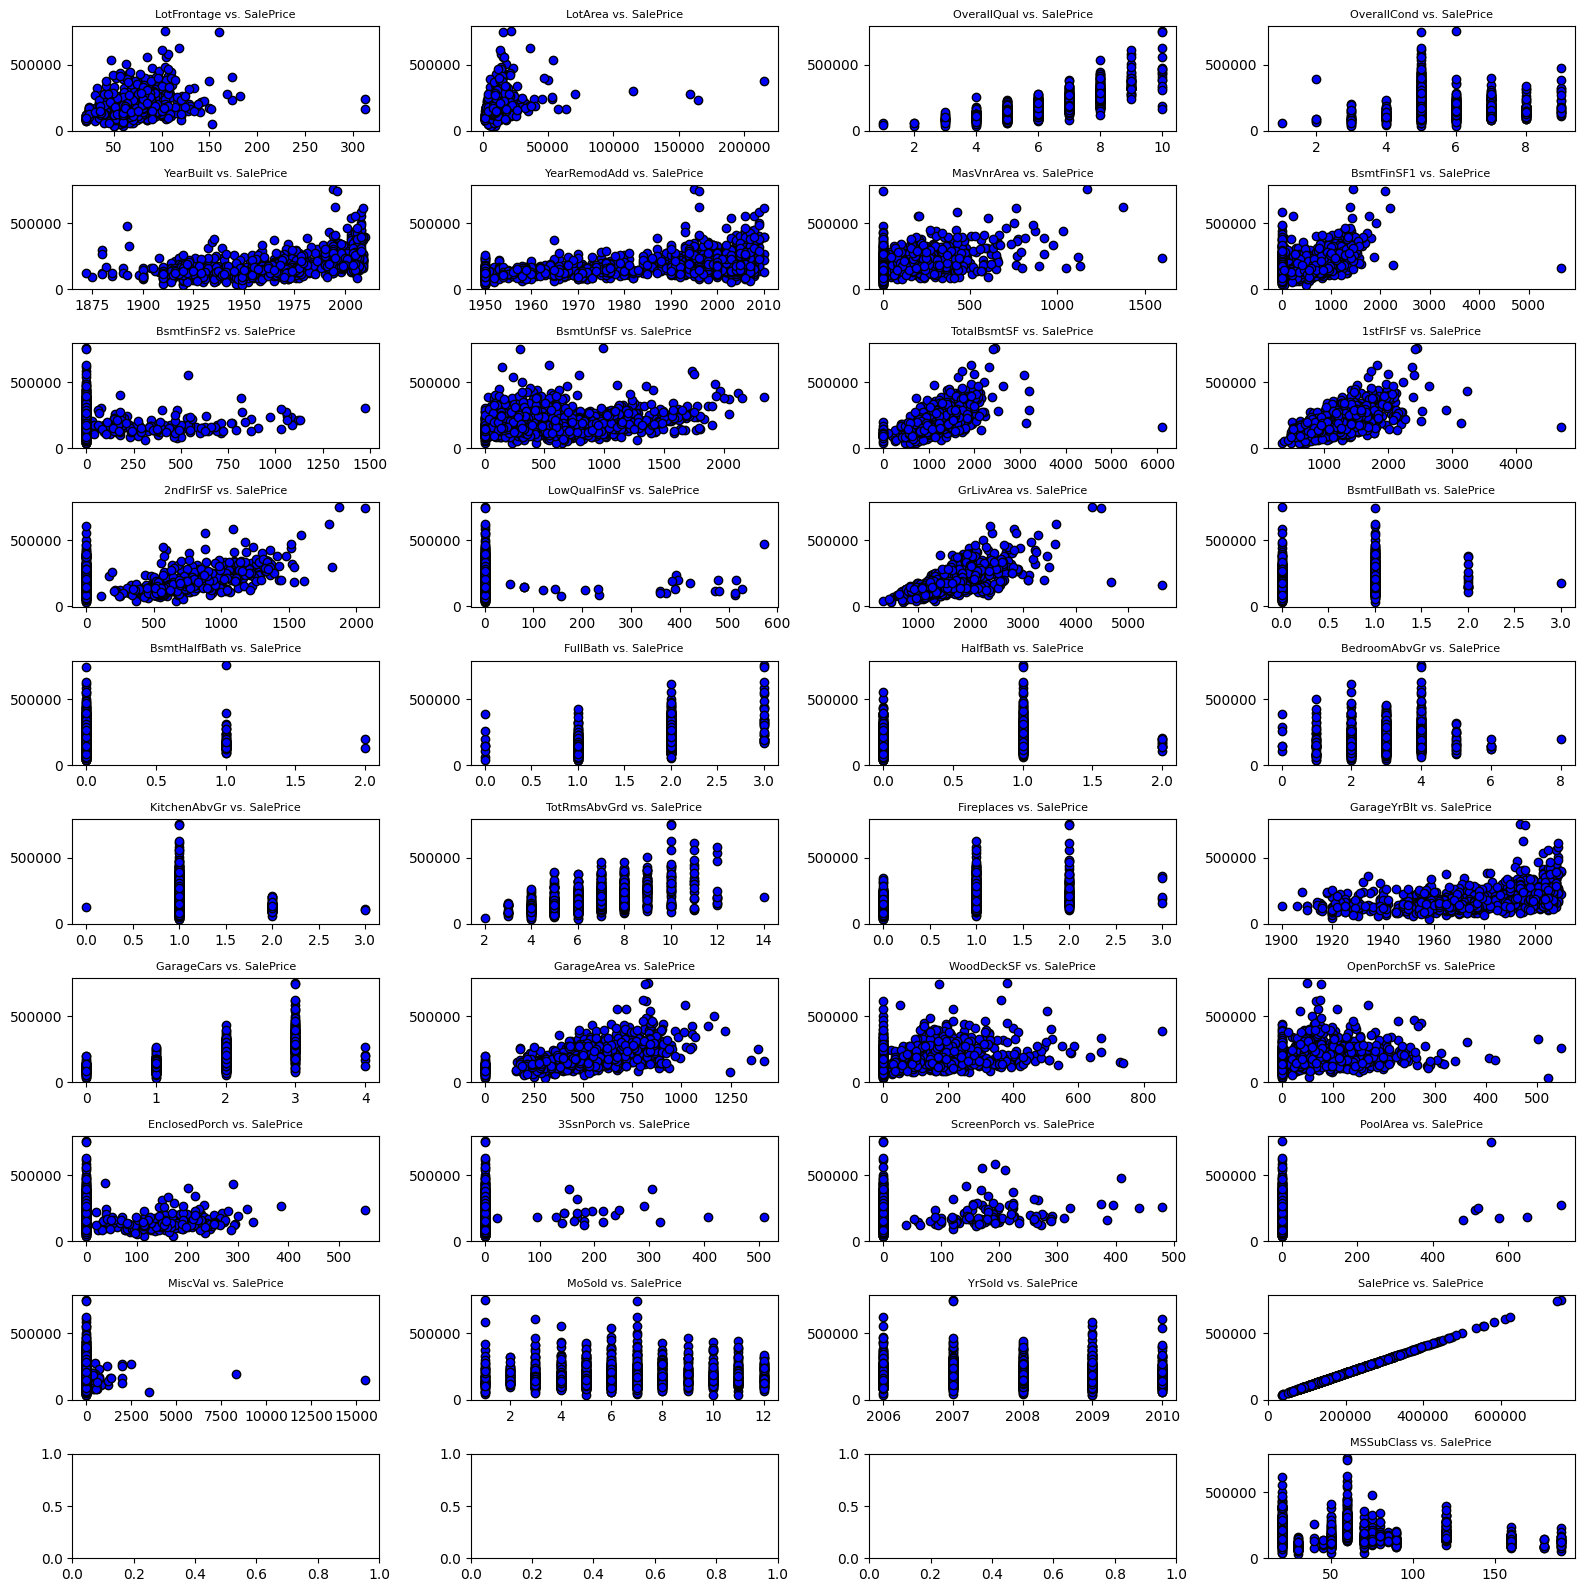

In [32]:
fig, axs = plt.subplots(10,4, figsize=(16,16),)
fig.subplots_adjust(hspace = 1, wspace=1)
axs = axs.ravel()

for index, column in enumerate([col for col in df1_dum.columns if df1_dum[col].dtype == 'int64' or df1_dum[col].dtype == 'float64']):
    axs[index-1].set_title("{} vs. SalePrice".format(column),fontsize=8)
    axs[index-1].scatter(x=df1_dum[column],y=df1_dum['SalePrice'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)

    ##### Check for Multicolinearity

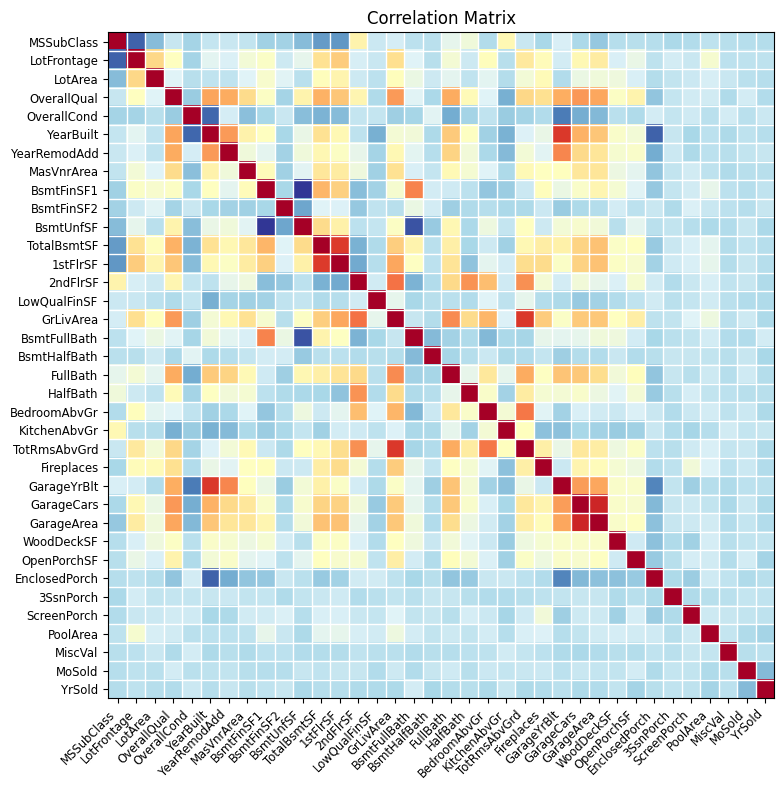

In [33]:
# We only compare the predictor variables, and thus drop the target `mpg` column.

corr = df1.drop('SalePrice', axis='columns').corr()
fig, ax = plt.subplots(figsize=(30, 8))
plot_corr(corr,xnames=corr.columns, ax=ax)

plt.show()

    ##### Fitting the model using statsmodels.OLS

In [34]:
# Model DataFrame with all of the columns:
dfm = df1_dum.copy()

# The dependent variable:
y_name = 'SalePrice'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names)
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 SalePrice ~ MSSubClass + LotFrontage + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + 1stFlrSF + 2ndFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageCars + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold + MSZoning_FV + MSZoning_RH + MSZoning_RL + MSZoning_RM + Street_Pave + LotShape_IR2 + LotShape_IR3 + LotShape_Reg + LandContour_HLS + LandContour_Low + LandContour_Lvl + Utilities_NoSeWa + LotConfig_CulDSac + LotConfig_FR2 + LotConfig_FR3 + LotConfig_Inside + LandSlope_Mod + LandSlope_Sev + Neighborhood_Blueste + Neighborhood_BrDale + Neighborhood_BrkSide + Neighborhood_ClearCr + Neighborhood_CollgCr + Neighborhood_Crawfor + Neighborhood_Edwards + Neighborhood_Gilbert + Neighborhood_IDOTRR + Neighborhood_Mead

In [35]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

 <a id="five"></a>
### 5. Data Preprocessing/Engineering
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Preprocessing/Engineering ⚡ |
| :--------------------------- |
| In this section, cleaning the dataset, and possibly creating new features - as identified in the EDA phase. |

---

In [36]:
df1_dum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


#### Variable Selection By Variance Thresholds

In [ ]:
# Separate data into independent (X) and independent (y) variables

X = list(df1_dum.columns)
X.remove(y_name)
X_data = df1_dum[X]
y_data = df1_dum[y_name]

In [ ]:
# Normalize data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [ ]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [ ]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
98,HouseStyle_1Story,0.249992
195,KitchenQual_TA,0.249988
162,BsmtQual_TA,0.246922
156,Foundation_PConc,0.246768
155,Foundation_CBlock,0.245676
...,...,...
110,RoofMatl_Membran,0.000684
122,Exterior1st_ImStucc,0.000684
91,Condition2_RRAn,0.000684
133,Exterior2nd_CBlock,0.000684


In [ ]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,MSSubClass,YearBuilt,YearRemodAdd,BsmtUnfSF,2ndFlrSF,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageCars,...,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_TA,GarageCond_TA,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.949275,0.883333,0.064212,0.413559,0.666667,0.5,0.000000,0.936364,0.50,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
1,0.000000,0.753623,0.433333,0.121575,0.000000,0.666667,0.0,0.333333,0.690909,0.50,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
2,0.235294,0.934783,0.866667,0.185788,0.419370,0.666667,0.5,0.333333,0.918182,0.50,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
3,0.294118,0.311594,0.333333,0.231164,0.366102,0.333333,0.0,0.333333,0.890909,0.75,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.235294,0.927536,0.833333,0.209760,0.509927,0.666667,0.5,0.333333,0.909091,0.75,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
X_new.shape

(1460, 102)

In [ ]:
formula_str = y_name+' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	SalePrice ~ MSSubClass + YearBuilt + YearRemodAdd + BsmtUnfSF + 2ndFlrSF + FullBath + HalfBath + Fireplaces + GarageYrBlt + GarageCars + MoSold + YrSold + MSZoning_FV + MSZoning_RL + MSZoning_RM + LotShape_Reg + LandContour_HLS + LandContour_Lvl + LotConfig_CulDSac + LotConfig_FR2 + LotConfig_Inside + LandSlope_Mod + Neighborhood_BrkSide + Neighborhood_CollgCr + Neighborhood_Crawfor + Neighborhood_Edwards + Neighborhood_Gilbert + Neighborhood_Mitchel + Neighborhood_NAmes + Neighborhood_NWAmes + Neighborhood_NridgHt + Neighborhood_OldTown + Neighborhood_Sawyer + Neighborhood_SawyerW + Neighborhood_Somerst + Condition1_Feedr + Condition1_Norm + BldgType_Duplex + BldgType_TwnhsE + HouseStyle_1Story + HouseStyle_2Story + HouseStyle_SLvl + RoofStyle_Gable + RoofStyle_Hip + Exterior1st_BrkFace + Exterior1st_CemntBd + Exterior1st_HdBoard + Exterior1st_MetalSd + Exterior1st_Plywood + Exterior1st_VinylSd + Exterior1st_Wd_Sdng + Exterior2nd_CmentBd + Exterior2nd_HdBoard + Exterior2nd_M

In [ ]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=df1_dum)
fitted = model.fit()

print(fitted.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

#### Pre Processing

In [ ]:
X_new

 <a id="six"></a>
### 6. Model Building
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model Building ⚡ |
| :--------------------------- |
| In this section, one or more regression models that are able to accurately predict house prices woulde be created. |

---

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

 <a id="seven"></a>
### 7. Model Evaluation/Performance
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model Evaluation/Performance ⚡ |
| :--------------------------- |
| In this section, the relative performance of the various trained ML models on the dataset and comment on what model is the best and why would be done. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

 <a id="eight"></a>
### 8. Model Deployment
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model Deployment ⚡ |
| :--------------------------- |
| In this section, the model would be deployed. |

---